# Linear Regression
- Attempts to establish how X causes Y

### Correlation vs Linear Regression
**Similarities**
- Quantify the direction and strength of the relationship

**Differences**
- Correlation is a single statistic
- Linear regression produces an equation

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


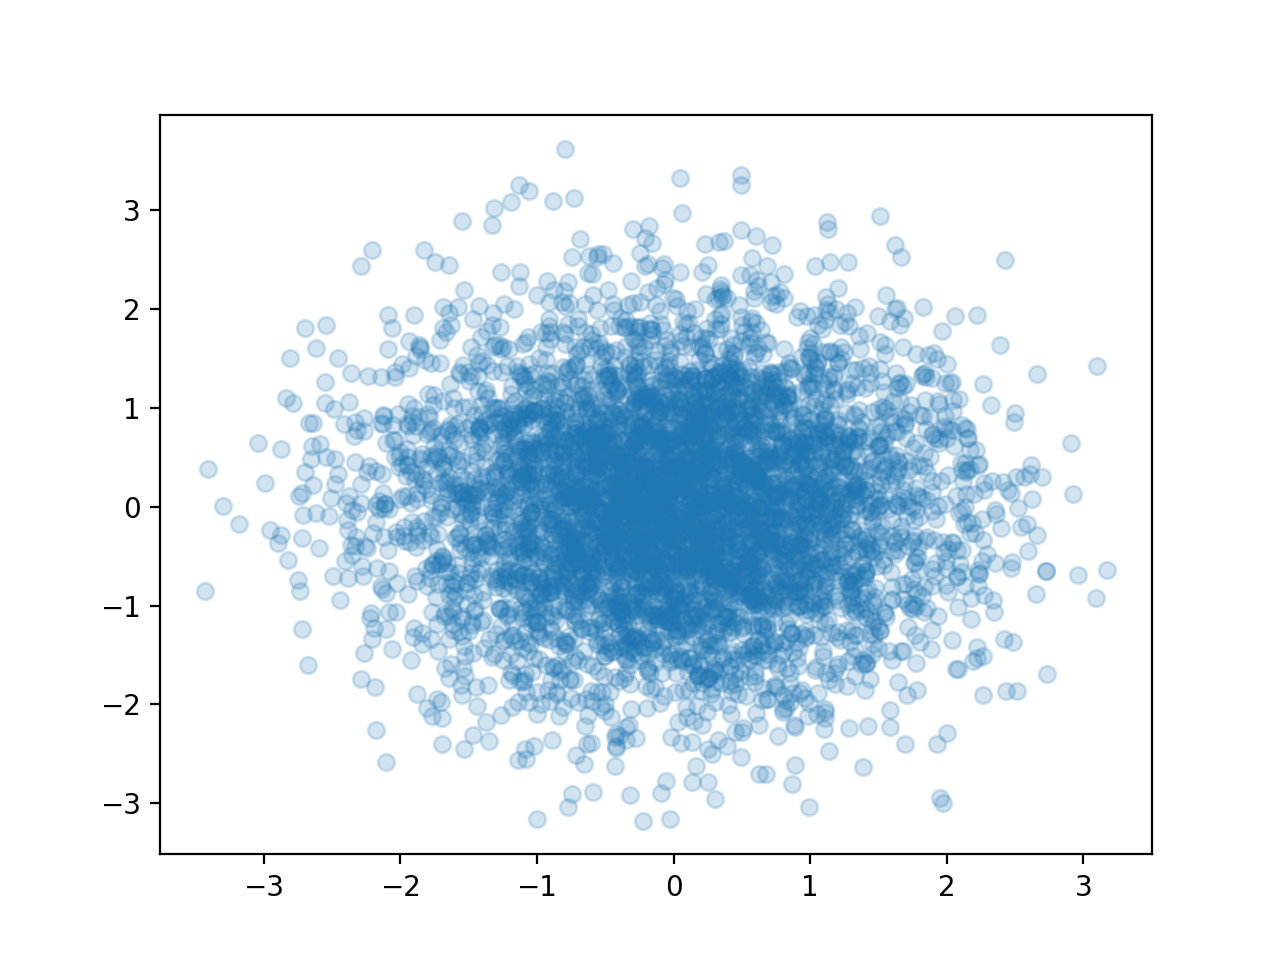

In [3]:
X = np.random.randn(5000)
Y = np.random.randn(5000)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=.2)

In [4]:
tickers = ['AAPL', 'TWTR', 'IBM', 'MSFT', '^GSPC']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [6]:
data = data['Adj Close']

In [7]:
data.head()

Symbols,AAPL,TWTR,IBM,MSFT,^GSPC
Date,,,,,
2020-01-02,74.333511,32.299999,126.975204,158.571075,3257.850098
2020-01-03,73.610840,31.520000,125.962540,156.596588,3234.850098
2020-01-06,74.197395,31.639999,125.737526,157.001373,3246.280029
2020-01-07,73.848442,32.540001,125.821907,155.569855,3237.179932
2020-01-08,75.036385,33.049999,126.872055,158.047836,3253.050049


In [8]:
log_returns = np.log(data/data.shift())

In [9]:
log_returns

Symbols,AAPL,TWTR,IBM,MSFT,^GSPC
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.024445,-0.008007,-0.012530,-0.007085
2020-01-06,0.007937,0.003800,-0.001788,0.002582,0.003527
2020-01-07,-0.004714,0.028048,0.000671,-0.009160,-0.002807
2020-01-08,0.015958,0.015551,0.008312,0.015803,0.004890
...,...,...,...,...,...
2021-02-18,-0.008674,0.006526,0.006315,-0.001680,-0.004426
2021-02-19,0.001233,0.000277,-0.014517,-0.011635,-0.001857
2021-02-22,-0.030252,-0.025077,0.015593,-0.027174,-0.007763


In [18]:
def linear_regression(ticker_a, ticker_b):
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1, 1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)

    lin_regr = LinearRegression()
    lin_regr.fit(X, Y)

    Y_pred = lin_regr.predict(X)

    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0, 0]

    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta: " + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c='r')

<IPython.core.display.Javascript object>


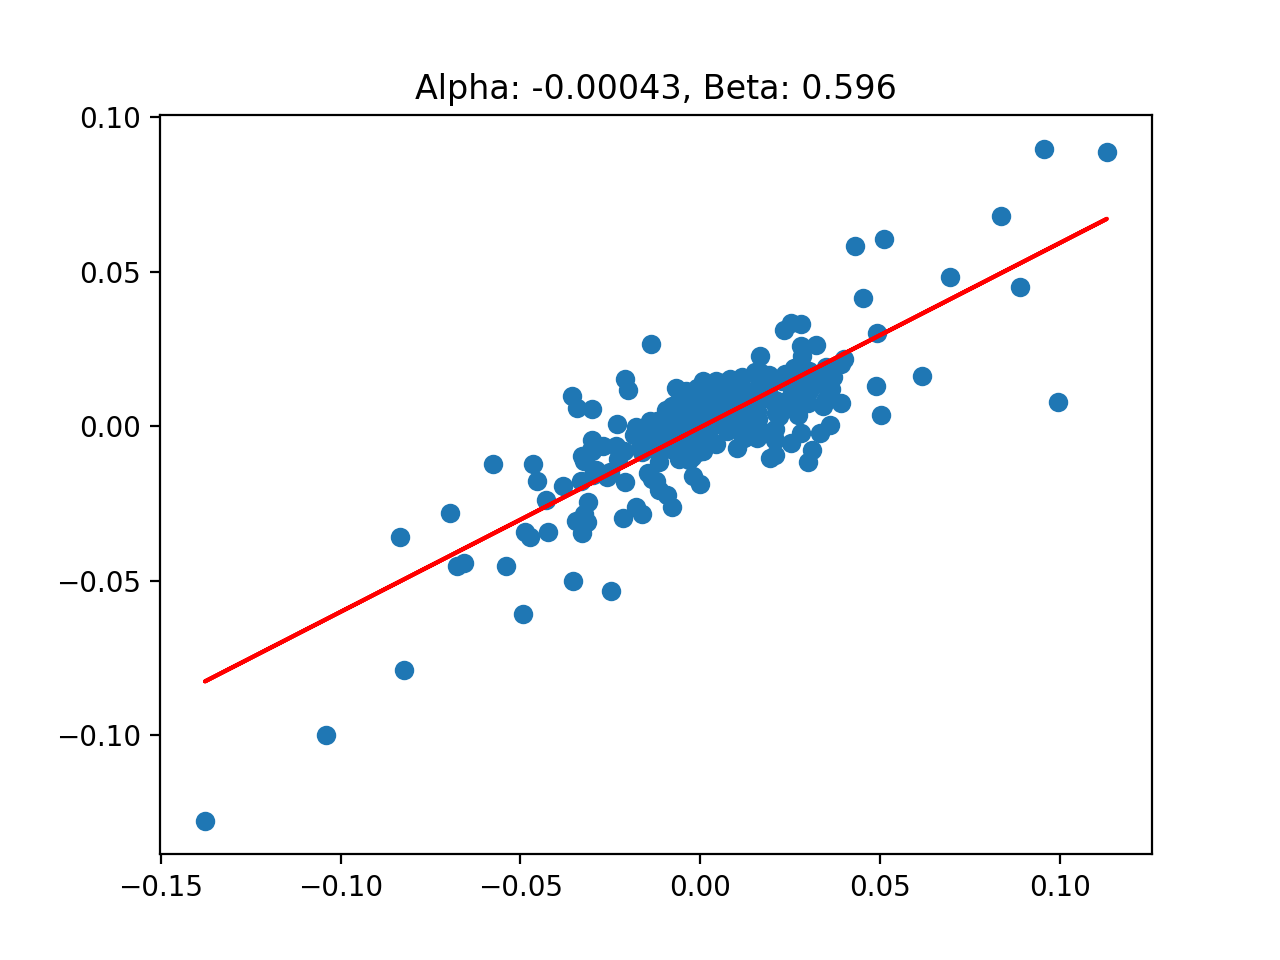

In [21]:
linear_regression("AAPL", "^GSPC")

<IPython.core.display.Javascript object>


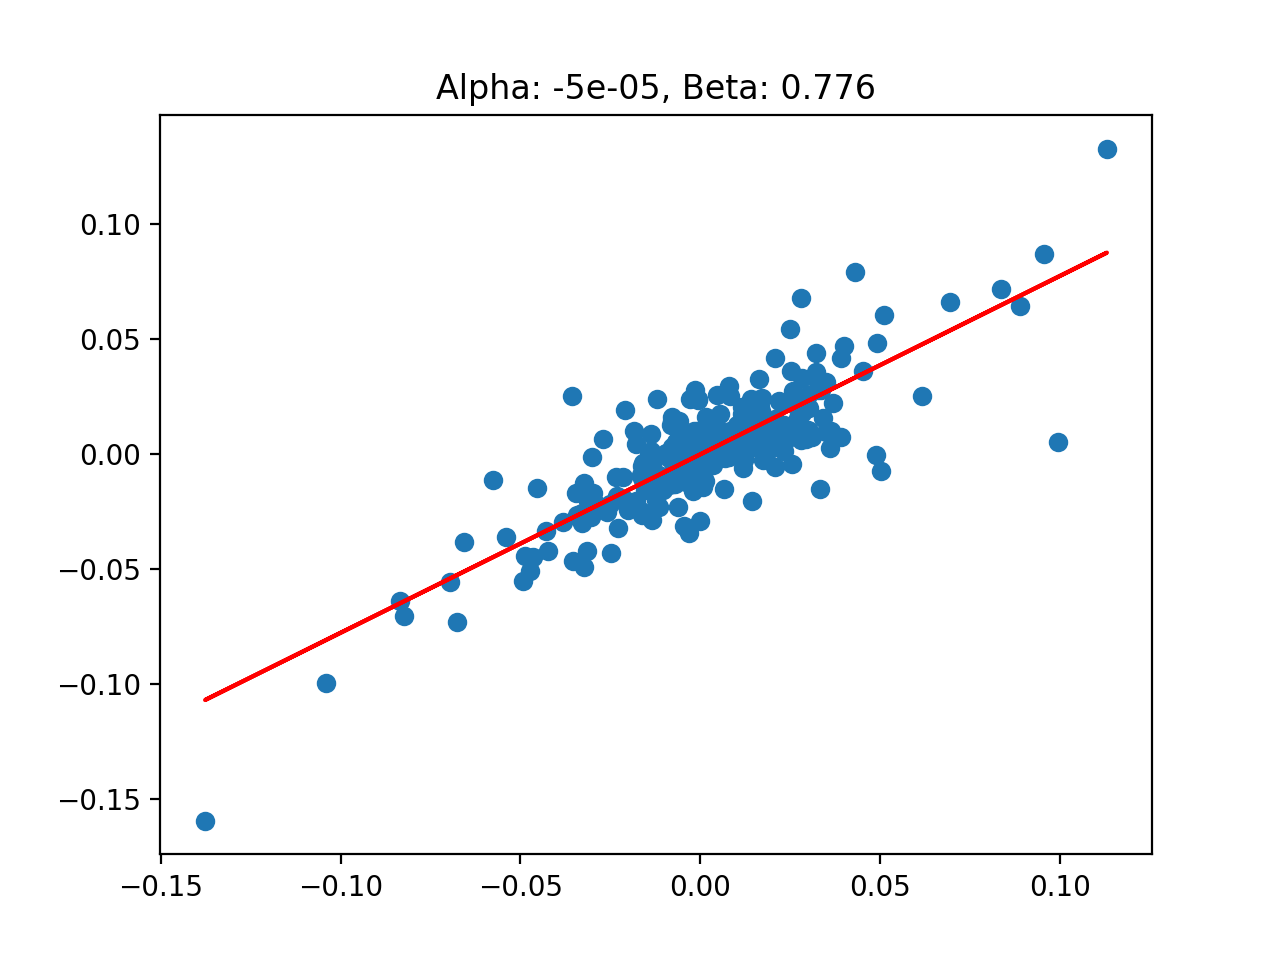

In [22]:
linear_regression("AAPL", "MSFT")

<IPython.core.display.Javascript object>


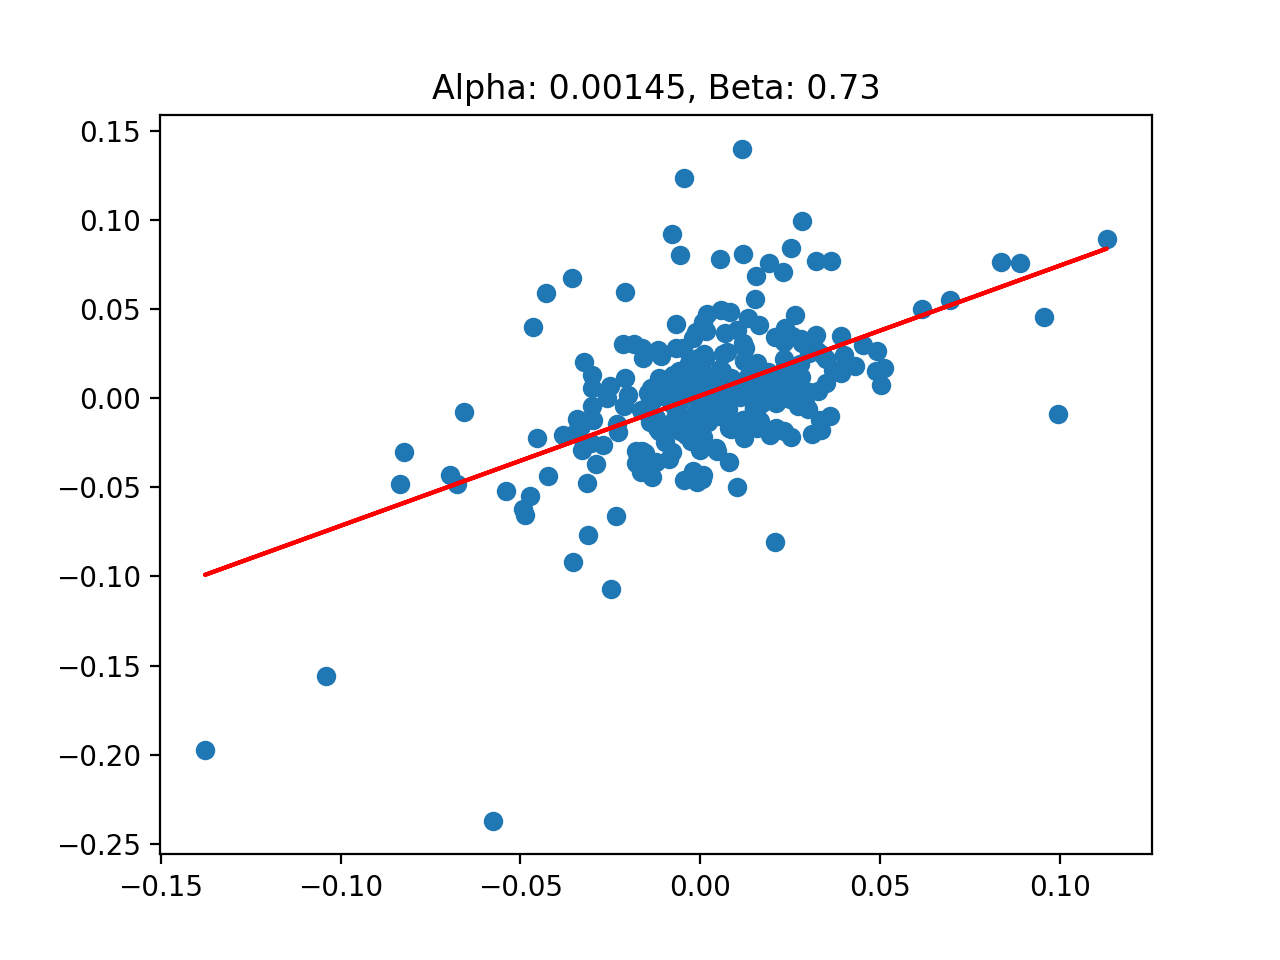

In [23]:
linear_regression("AAPL", "TWTR")